In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq



In [54]:
data = pd.read_csv('/content/drive/MyDrive/urbandictionary.csv')
data.shape


(4272, 7)

In [55]:
data.head()

,definition,word,author,tags,up,down,date
0,When a city or town specifically zones an area...,Jizzneyland,whocaresaboutNY,"[u'#jisneyland', u'#gizzneyland', u'#adult zon...",6267,6382,"April 05, 2013"
1,A toilet bowl.,trump basket,jknightx,[],729,634,"March 23, 2017"
2,Excellent health care reserved exclusively for...,wealth care,Davis Finch,"[u'#insurance', u'#rich', u'#america', u'#capi...",1072,625,"May 16, 2008"
3,A dick thing you say to a tall person to piss ...,hows the weather up there,Jackalfu,[],1428,580,"March 20, 2017"
4,"The insane, narcissistic, outrageous asshat wh...",ratfucker,FedupAngryLiberal,"[u'#trump', u'#asshat', u'#scum', u'#asshole',...",1580,2351,"March 18, 2017"


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   definition  4272 non-null   object
 1   word        4272 non-null   object
 2   author      4272 non-null   object
 3   tags        4272 non-null   object
 4   up          4272 non-null   int64 
 5   down        4272 non-null   int64 
 6   date        4272 non-null   object
dtypes: int64(2), object(5)
memory usage: 233.8+ KB


In [57]:
data.describe()

,up,down
count,4272.000000,4272.000000
mean,4414.286517,3073.106273
std,4509.887949,2729.129405
min,3.000000,0.000000
25%,1527.500000,794.750000
50%,3772.500000,2317.500000
75%,6164.500000,4960.500000
max,100236.000000,32371.000000


In [58]:
data.drop(['tags','date'], axis=1, inplace=True)

In [59]:
# name of the 'author' with more contributions.


data['contribution_size'] = data['word'].str.split().str.len()



author_contributions = data.groupby('author')['contribution_size'].sum()


author_with_most_contributions = author_contributions.idxmax()

print(f"The author with the most contributions is: {author_with_most_contributions}")

The author with the most contributions is: Anonymous


In [60]:
# @title Positive and Negative Votes
positive_votes = data['up'].sum()
print(f"The total number of positive votes is: {positive_votes}")
negative_votes = data['down'].sum()
print(f"The total number of negative votes is: {negative_votes}")

The total number of positive votes is: 18857832
The total number of negative votes is: 13128310


In [61]:
# @title The word with the most Positive and Negative votes

word_with_most_upvotes = data.loc[data['up'].idxmax(), 'word']
word_with_most_downvotes = data.loc[data['down'].idxmax(), 'word']
print(f"The word with the most negative votes is: {word_with_most_downvotes}")
print(f"The word with the most positive votes is: {word_with_most_upvotes}")

The word with the most negative votes is: Donald Trump
The word with the most positive votes is: love


***Sentiment Analysis***

In [62]:
!pip install afinn
from afinn import Afinn

afinn = Afinn(language='en')

data['sentiment_score'] = data['definition'].apply(afinn.score)

print(data[['definition', 'sentiment_score']].head())


                                          definition  sentiment_score
0  When a city or town specifically zones an area...              0.0
1                                     A toilet bowl.              0.0
2  Excellent health care reserved exclusively for...              7.0
3  A dick thing you say to a tall person to piss ...             -8.0
4  The insane, narcissistic, outrageous asshat wh...            -12.0


In [63]:

afinn = Afinn(language='en')
data['definition_score'] = data['definition'].apply(afinn.score)

print(data[['definition', 'definition_score']].head())

                                          definition  definition_score
0  When a city or town specifically zones an area...               0.0
1                                     A toilet bowl.               0.0
2  Excellent health care reserved exclusively for...               7.0
3  A dick thing you say to a tall person to piss ...              -8.0
4  The insane, narcissistic, outrageous asshat wh...             -12.0


In [64]:
data.head()

,definition,word,author,up,down,contribution_size,sentiment_score,definition_score
0,When a city or town specifically zones an area...,Jizzneyland,whocaresaboutNY,6267,6382,1,0.0,0.0
1,A toilet bowl.,trump basket,jknightx,729,634,2,0.0,0.0
2,Excellent health care reserved exclusively for...,wealth care,Davis Finch,1072,625,2,7.0,7.0
3,A dick thing you say to a tall person to piss ...,hows the weather up there,Jackalfu,1428,580,5,-8.0,-8.0
4,"The insane, narcissistic, outrageous asshat wh...",ratfucker,FedupAngryLiberal,1580,2351,1,-12.0,-12.0


***The Worst and The best definitions***

In [65]:

worst_definition = data.loc[data['definition_score'].idxmin()]
best_definition = data.loc[data['definition_score'].idxmax()]

print("Worst Definition:")
print(worst_definition[['definition', 'definition_score']])

print("\nBest Definition:")
print(best_definition[['definition', 'definition_score']])

Worst Definition:
definition          A boss ass bitch is a woman who goes above and...
definition_score                                                -39.0
Name: 899, dtype: object

Best Definition:
definition          1. Describing a totally whimsical and lovely s...
definition_score                                                 24.0
Name: 4128, dtype: object


***Worst Sentiment Words***

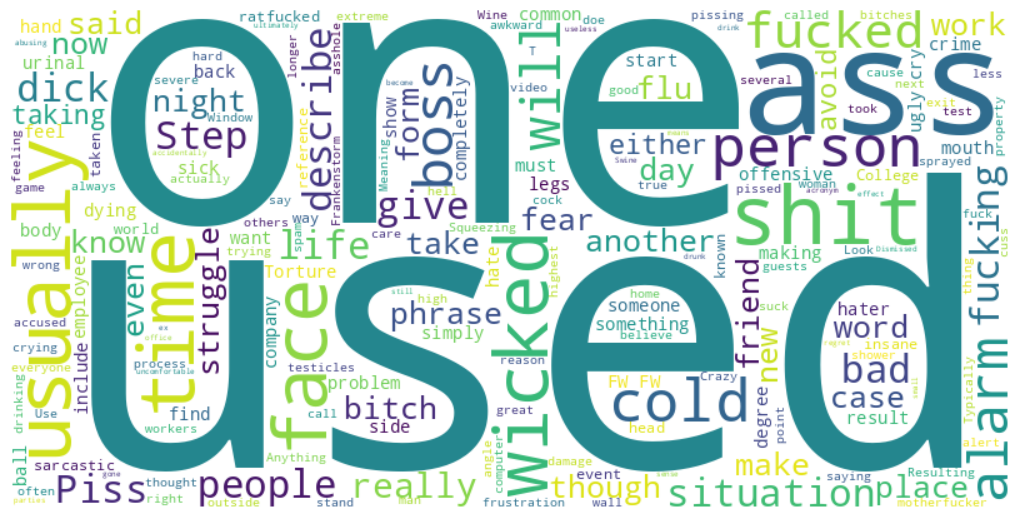

In [66]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


worst_words = data[data['definition_score'] < -10]


text = " ".join(worst_words['definition'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

***Best Sentiment Words***

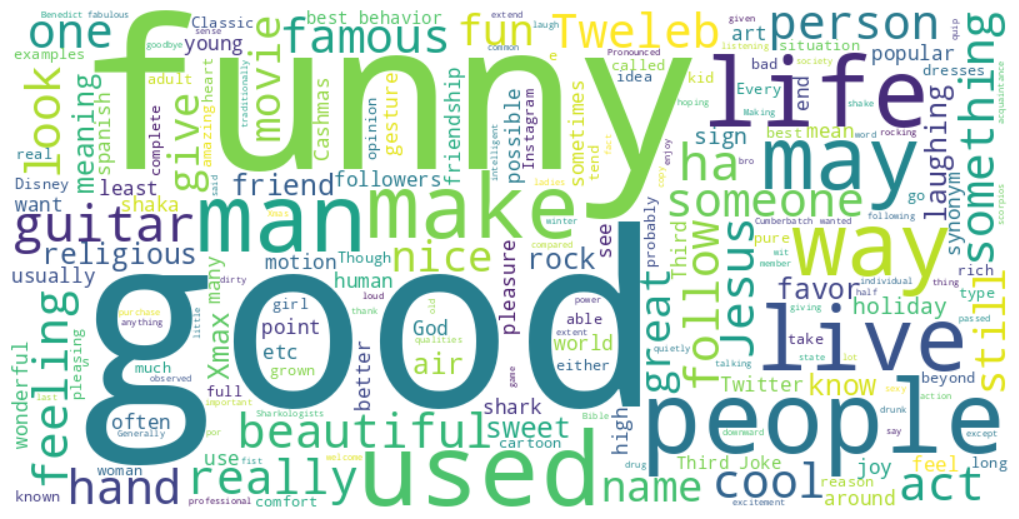

In [67]:

worst_words = data[data['definition_score'] > 10]
text = " ".join(worst_words['definition'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()